# Forever Red vs Blue:
## League of Legends: Analysis of Main Objectives and Their Impact on Match Outcomes

__By Lotus Baumgarner__

Since its inception in October 2009, League of Legends has emerged as one of the foremost esports globally, boasting a player base and fan following that rivals, and perhaps surpasses, even the NFL. Despite significant evolution since its original client, League of Legends has consistently maintained its reputation as a skill-based, free-to-play game. Monetization is strictly through optional character customization, ensuring no pay-to-win elements.

Each match in League of Legends begins with all players starting at level one. Players must collaborate with their teammates to level up, purchase new items, and achieve various in-game objectives to secure victory.

This project focuses on analyzing the key objectives within League of Legends matches and evaluating their impact on the likelihood of winning. By examining objective-related data, we aim to provide actionable insights into the strategic elements that most significantly influence match outcomes.


## Data Set Overview: League of Legends Ranked Match Data (NA)

The data set, titled __League of Legends Ranked Match Data from NA__, was sourced from Kaggle and comprises data from over 10,000 matches featuring players approximately ranked at the Gold level within League of Legends. The original dataset contains 775 columns, capturing a wide array of variables including individual player items, kills, deaths, champions, and various team statistics and objectives.

For this personal project, the focus was narrowed to the primary objectives of the game rather than individual player statistics. Consequently, all rows pertaining to summoners 1 to 5 on both the Red and Blue teams were removed, reducing the dataset to 24 columns. Further refinements, such as combining similar columns (e.g., b_tower_kills and r_tower_kills), resulted in a final dataset comprising 17 columns.

Notably, the dataset contained no missing values, and the target variable, Winner, was relatively balanced. As a result, all 10,013 rows were retained, yielding a final dataset of 10,013 rows across 17 columns.

This refined dataset will be utilized to analyze the impact of key objectives on match outcomes, providing insights into the strategic elements that most significantly influence victory in League of Legends.

__Original Data Set Link:__ https://www.kaggle.com/datasets/jamesbting/league-of-legends-ranked-match-data-from-na

  
  
### Columns After Cleaning and Formatting:
__Tower_Kills_Blue:__ Number of towers killed by the blue team  
__Inhib_Kills_Blue:__ Number of inhibitors taken by the blue team  
__Baron_Kills_Blue:__ Number of Barons killed by the blue team  
__Dragon_Kills_Blue:__ Number of dragons killed by the blue team  
__Rift_Kills_Blue:__ Number of Rift Heralds killed by the blue team  
__Tower_Kills_Red:__ Number of towers killed by the red team  
__Inhib_Kills_Red:__ Number of inhibitors taken by the red team  
__Baron_Kills_Red:__ Number of Barons killed by the red team  
__Dragon_Kills_Red:__ Number of dragons killed by the red team  
__Rift_Kills_Red:__ Number of Rift Heralds killed by the red team  
__First_Blood:__ Team that achieved the first kill  
__First_Tower:__ Team that destroyed the first tower  
__First_Inhibitor:__ Team that destroyed the first inhibitor  
__First_Baron:__ Team that killed the first Baron  
__First_Dragon:__ Team that killed the first dragon  
__First_Rift_Herald:__ Team that killed the first Rift Herald  
__Winner:__ The team that won the game  



# 1. Data Exploration and Cleaning

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Statistics Testing
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

In [2]:
# Loaded in Original Data Set and viewed first ten rows
df = pd.read_csv('C:\\Users\\lotus\\Documents\\Personal_Projects\\League_of_Legends\\Data\\training_data.csv')

df.head()

,'gameId','b_firstBlood','b_firstTower','b_firstInhibitor','b_firstBaron','b_firstDragon','b_firstRiftHerald','b_towerKills','b_inhibitorKills','b_baronKills',...,'r_summoner5_firstBloodKill','r_summoner5_firstBloodAssist','r_summoner5_firstTowerKill','r_summoner5_firstTowerAssist','r_summoner5_combatPlayerScore','r_summoner5_objectivePlayerScore','r_summoner5_totalPlayerScore','r_summoner5_totalScoreRank','b_win','r_win'
0,3376031541,False,True,True,True,True,False,9,1,1,...,False,False,False,False,0,0,0,0,1,0
1,3419506031,False,False,True,True,False,False,10,4,3,...,False,False,False,False,0,0,0,0,1,0
2,3419541356,True,True,False,False,False,True,2,0,0,...,False,False,False,False,0,0,0,0,1,0
3,3419796753,True,True,True,True,False,False,8,2,1,...,False,False,False,False,0,0,0,0,1,0
4,3418930158,True,True,True,False,False,True,11,3,0,...,False,False,False,False,0,0,0,0,1,0


In [3]:
# Used a For Loop to print the actual content of the column names to look for extra characters or white spaces.


for col in df.columns[:15]:
    print(repr(col))

"'gameId'"
" 'b_firstBlood'"
" 'b_firstTower'"
" 'b_firstInhibitor'"
" 'b_firstBaron'"
" 'b_firstDragon'"
" 'b_firstRiftHerald'"
" 'b_towerKills'"
" 'b_inhibitorKills'"
" 'b_baronKills'"
" 'b_dragonKills'"
" 'b_riftHeraldKills'"
" 'r_firstBlood'"
" 'r_firstTower'"
" 'r_firstInhibitor'"


In [4]:
# Used the strip string method to remove unwanted white spaces
df.columns = df.columns.str.strip()

# Used a lambda function to remove the quotation marks surrounding the column names
df = df.rename(columns=lambda x: x.replace("'", "").replace('"', ''))

In [5]:
# Dropped all of the columns from individual Summoners 1-5 from the Blue Team
df = df.drop(columns=[
    'b_summoner1_accountId', 'b_summoner1_level', 'b_summoner1_role', 'b_summoner1_lane', 'b_summoner1_championLevel', 'b_summoner1_championPoints', 'b_summoner1_lastPlayTime', 'b_summoner1_championPointsSinceLastLevel', 'b_summoner1_championPointsUntilNextLevel', 'b_summoner1_chestGranted', 'b_summoner1_tokensEarned', 'b_summoner1_totalChampionMastery', 'b_summoner1_championId', 'b_summoner1_spell1Id', 'b_summoner1_spell2Id',
    'b_summoner1_item0', 'b_summoner1_item1', 'b_summoner1_item2', 'b_summoner1_item3', 'b_summoner1_item4', 'b_summoner1_item5', 'b_summoner1_item6', 'b_summoner1_kills', 'b_summoner1_deaths', 'b_summoner1_assists', 'b_summoner1_largestKillingSpree', 'b_summoner1_largestMultiKill', 'b_summoner1_killingSprees', 'b_summoner1_longestTimeSpentLiving', 'b_summoner1_doubleKills', 'b_summoner1_tripleKills',
    'b_summoner1_quadraKills', 'b_summoner1_pentaKills', 'b_summoner1_totalDamageDealt', 'b_summoner1_magicDamageDealt', 'b_summoner1_physicalDamageDealt', 'b_summoner1_trueDamageDealt', 'b_summoner1_largestCriticalStrike', 'b_summoner1_totalDamageDealtToChampions', 'b_summoner1_magicDamageDealtToChampions', 'b_summoner1_physicalDamageDealtToChampions', 'b_summoner1_trueDamageDealtToChampions', 'b_summoner1_totalHeal', 'b_summoner1_totalUnitsHealed',
    'b_summoner1_damageSelfMitigated', 'b_summoner1_damageDealtToObjectives', 'b_summoner1_damageDealtToTurrets', 'b_summoner1_visionScore', 'b_summoner1_timeCCingOthers', 'b_summoner1_totalDamageTaken', 'b_summoner1_magicalDamageTaken', 'b_summoner1_physicalDamageTaken', 'b_summoner1_trueDamageTaken', 'b_summoner1_goldEarned', 'b_summoner1_goldSpent', 'b_summoner1_turretKills', 'b_summoner1_inhibitorKills', 'b_summoner1_totalMinionsKilled',
    'b_summoner1_neutralMinionsKilled', 'b_summoner1_neutralMinionsKilledTeamJungle', 'b_summoner1_neutralMinionsKilledEnemyJungle', 'b_summoner1_totalTimeCrowdControlDealt', 'b_summoner1_champLevel', 'b_summoner1_visionWardsBoughtInGame', 'b_summoner1_sightWardsBoughtInGame', 'b_summoner1_wardsPlaced', 'b_summoner1_wardsKilled', 'b_summoner1_firstBloodKill', 'b_summoner1_firstBloodAssist', 'b_summoner1_firstTowerKill', 'b_summoner1_firstTowerAssist',
    'b_summoner1_combatPlayerScore', 'b_summoner1_objectivePlayerScore', 'b_summoner1_totalPlayerScore', 'b_summoner1_totalScoreRank', 'b_summoner2_accountId', 'b_summoner2_level', 'b_summoner2_role', 'b_summoner2_lane', 'b_summoner2_championLevel', 'b_summoner2_championPoints', 'b_summoner2_lastPlayTime', 'b_summoner2_championPointsSinceLastLevel', 'b_summoner2_championPointsUntilNextLevel', 'b_summoner2_chestGranted', 'b_summoner2_tokensEarned', 'b_summoner2_totalChampionMastery', 'b_summoner2_championId', 'b_summoner2_spell1Id', 'b_summoner2_spell2Id',
    'b_summoner2_item0', 'b_summoner2_item1', 'b_summoner2_item2', 'b_summoner2_item3', 'b_summoner2_item4', 'b_summoner2_item5', 'b_summoner2_item6', 'b_summoner2_kills', 'b_summoner2_deaths', 'b_summoner2_assists', 'b_summoner2_largestKillingSpree', 'b_summoner2_largestMultiKill', 'b_summoner2_killingSprees', 'b_summoner2_longestTimeSpentLiving', 'b_summoner2_doubleKills', 'b_summoner2_tripleKills',
    'b_summoner2_quadraKills', 'b_summoner2_pentaKills', 'b_summoner2_totalDamageDealt', 'b_summoner2_magicDamageDealt', 'b_summoner2_physicalDamageDealt', 'b_summoner2_trueDamageDealt', 'b_summoner2_largestCriticalStrike', 'b_summoner2_totalDamageDealtToChampions', 'b_summoner2_magicDamageDealtToChampions', 'b_summoner2_physicalDamageDealtToChampions', 'b_summoner2_trueDamageDealtToChampions', 'b_summoner2_totalHeal', 'b_summoner2_totalUnitsHealed',
    'b_summoner2_damageSelfMitigated', 'b_summoner2_damageDealtToObjectives', 'b_summoner2_damageDealtToTurrets', 'b_summoner2_visionScore', 'b_summoner2_timeCCingOthers', 'b_summoner2_totalDamageTaken', 'b_summoner2_magicalDamageTaken', 'b_summoner2_physicalDamageTaken', 'b_summoner2_trueDamageTaken', 'b_summoner2_goldEarned', 'b_summoner2_goldSpent', 'b_summoner2_turretKills', 'b_summoner2_inhibitorKills', 'b_summoner2_totalMinionsKilled',
    'b_summoner2_neutralMinionsKilled', 'b_summoner2_neutralMinionsKilledTeamJungle', 'b_summoner2_neutralMinionsKilledEnemyJungle', 'b_summoner2_totalTimeCrowdControlDealt', 'b_summoner2_champLevel', 'b_summoner2_visionWardsBoughtInGame', 'b_summoner2_sightWardsBoughtInGame', 'b_summoner2_wardsPlaced', 'b_summoner2_wardsKilled', 'b_summoner2_firstBloodKill', 'b_summoner2_firstBloodAssist', 'b_summoner2_firstTowerKill', 'b_summoner2_firstTowerAssist',
    'b_summoner2_combatPlayerScore', 'b_summoner2_objectivePlayerScore', 'b_summoner2_totalPlayerScore', 'b_summoner2_totalScoreRank', 'b_summoner3_accountId', 'b_summoner3_level', 'b_summoner3_role', 'b_summoner3_lane', 'b_summoner3_championLevel', 'b_summoner3_championPoints', 'b_summoner3_lastPlayTime', 'b_summoner3_championPointsSinceLastLevel', 'b_summoner3_championPointsUntilNextLevel', 'b_summoner3_chestGranted', 'b_summoner3_tokensEarned', 'b_summoner3_totalChampionMastery', 'b_summoner3_championId', 'b_summoner3_spell1Id', 'b_summoner3_spell2Id',
    'b_summoner3_item0', 'b_summoner3_item1', 'b_summoner3_item2', 'b_summoner3_item3', 'b_summoner3_item4', 'b_summoner3_item5', 'b_summoner3_item6', 'b_summoner3_kills', 'b_summoner3_deaths', 'b_summoner3_assists', 'b_summoner3_largestKillingSpree', 'b_summoner3_largestMultiKill', 'b_summoner3_killingSprees', 'b_summoner3_longestTimeSpentLiving', 'b_summoner3_doubleKills', 'b_summoner3_tripleKills',
    'b_summoner3_quadraKills', 'b_summoner3_pentaKills', 'b_summoner3_totalDamageDealt', 'b_summoner3_magicDamageDealt', 'b_summoner3_physicalDamageDealt', 'b_summoner3_trueDamageDealt', 'b_summoner3_largestCriticalStrike', 'b_summoner3_totalDamageDealtToChampions', 'b_summoner3_magicDamageDealtToChampions', 'b_summoner3_physicalDamageDealtToChampions', 'b_summoner3_trueDamageDealtToChampions', 'b_summoner3_totalHeal', 'b_summoner3_totalUnitsHealed',
    'b_summoner3_damageSelfMitigated', 'b_summoner3_damageDealtToObjectives', 'b_summoner3_damageDealtToTurrets', 'b_summoner3_visionScore', 'b_summoner3_timeCCingOthers', 'b_summoner3_totalDamageTaken', 'b_summoner3_magicalDamageTaken', 'b_summoner3_physicalDamageTaken', 'b_summoner3_trueDamageTaken', 'b_summoner3_goldEarned', 'b_summoner3_goldSpent', 'b_summoner3_turretKills', 'b_summoner3_inhibitorKills', 'b_summoner3_totalMinionsKilled',
    'b_summoner3_neutralMinionsKilled', 'b_summoner3_neutralMinionsKilledTeamJungle', 'b_summoner3_neutralMinionsKilledEnemyJungle', 'b_summoner3_totalTimeCrowdControlDealt', 'b_summoner3_champLevel', 'b_summoner3_visionWardsBoughtInGame', 'b_summoner3_sightWardsBoughtInGame', 'b_summoner3_wardsPlaced', 'b_summoner3_wardsKilled', 'b_summoner3_firstBloodKill', 'b_summoner3_firstBloodAssist', 'b_summoner3_firstTowerKill', 'b_summoner3_firstTowerAssist',
    'b_summoner3_combatPlayerScore', 'b_summoner3_objectivePlayerScore', 'b_summoner3_totalPlayerScore', 'b_summoner3_totalScoreRank', 'b_summoner4_accountId', 'b_summoner4_level', 'b_summoner4_role', 'b_summoner4_lane', 'b_summoner4_championLevel', 'b_summoner4_championPoints', 'b_summoner4_lastPlayTime', 'b_summoner4_championPointsSinceLastLevel', 'b_summoner4_championPointsUntilNextLevel', 'b_summoner4_chestGranted', 'b_summoner4_tokensEarned', 'b_summoner4_totalChampionMastery', 'b_summoner4_championId', 'b_summoner4_spell1Id', 'b_summoner4_spell2Id',
    'b_summoner4_item0', 'b_summoner4_item1', 'b_summoner4_item2', 'b_summoner4_item3', 'b_summoner4_item4', 'b_summoner4_item5', 'b_summoner4_item6', 'b_summoner4_kills', 'b_summoner4_deaths', 'b_summoner4_assists', 'b_summoner4_largestKillingSpree', 'b_summoner4_largestMultiKill', 'b_summoner4_killingSprees', 'b_summoner4_longestTimeSpentLiving', 'b_summoner4_doubleKills', 'b_summoner4_tripleKills',
    'b_summoner4_quadraKills', 'b_summoner4_pentaKills', 'b_summoner4_totalDamageDealt', 'b_summoner4_magicDamageDealt', 'b_summoner4_physicalDamageDealt', 'b_summoner4_trueDamageDealt', 'b_summoner4_largestCriticalStrike', 'b_summoner4_totalDamageDealtToChampions', 'b_summoner4_magicDamageDealtToChampions', 'b_summoner4_physicalDamageDealtToChampions', 'b_summoner4_trueDamageDealtToChampions', 'b_summoner4_totalHeal', 'b_summoner4_totalUnitsHealed',
    'b_summoner4_damageSelfMitigated', 'b_summoner4_damageDealtToObjectives', 'b_summoner4_damageDealtToTurrets', 'b_summoner4_visionScore', 'b_summoner4_timeCCingOthers', 'b_summoner4_totalDamageTaken', 'b_summoner4_magicalDamageTaken', 'b_summoner4_physicalDamageTaken', 'b_summoner4_trueDamageTaken', 'b_summoner4_goldEarned', 'b_summoner4_goldSpent', 'b_summoner4_turretKills', 'b_summoner4_inhibitorKills', 'b_summoner4_totalMinionsKilled',
    'b_summoner4_neutralMinionsKilled', 'b_summoner4_neutralMinionsKilledTeamJungle', 'b_summoner4_neutralMinionsKilledEnemyJungle', 'b_summoner4_totalTimeCrowdControlDealt', 'b_summoner4_champLevel', 'b_summoner4_visionWardsBoughtInGame', 'b_summoner4_sightWardsBoughtInGame', 'b_summoner4_wardsPlaced', 'b_summoner4_wardsKilled', 'b_summoner4_firstBloodKill', 'b_summoner4_firstBloodAssist', 'b_summoner4_firstTowerKill', 'b_summoner4_firstTowerAssist',
    'b_summoner4_combatPlayerScore', 'b_summoner4_objectivePlayerScore', 'b_summoner4_totalPlayerScore', 'b_summoner4_totalScoreRank', 'b_summoner5_accountId', 'b_summoner5_level', 'b_summoner5_role', 'b_summoner5_lane', 'b_summoner5_championLevel', 'b_summoner5_championPoints', 'b_summoner5_lastPlayTime', 'b_summoner5_championPointsSinceLastLevel', 'b_summoner5_championPointsUntilNextLevel', 'b_summoner5_chestGranted', 'b_summoner5_tokensEarned', 'b_summoner5_totalChampionMastery', 'b_summoner5_championId', 'b_summoner5_spell1Id', 'b_summoner5_spell2Id',
    'b_summoner5_item0', 'b_summoner5_item1', 'b_summoner5_item2', 'b_summoner5_item3', 'b_summoner5_item4', 'b_summoner5_item5', 'b_summoner5_item6', 'b_summoner5_kills', 'b_summoner5_deaths', 'b_summoner5_assists', 'b_summoner5_largestKillingSpree', 'b_summoner5_largestMultiKill', 'b_summoner5_killingSprees', 'b_summoner5_longestTimeSpentLiving', 'b_summoner5_doubleKills', 'b_summoner5_tripleKills',
    'b_summoner5_quadraKills', 'b_summoner5_pentaKills', 'b_summoner5_totalDamageDealt', 'b_summoner5_magicDamageDealt', 'b_summoner5_physicalDamageDealt', 'b_summoner5_trueDamageDealt', 'b_summoner5_largestCriticalStrike', 'b_summoner5_totalDamageDealtToChampions', 'b_summoner5_magicDamageDealtToChampions', 'b_summoner5_physicalDamageDealtToChampions', 'b_summoner5_trueDamageDealtToChampions', 'b_summoner5_totalHeal', 'b_summoner5_totalUnitsHealed',
    'b_summoner5_damageSelfMitigated', 'b_summoner5_damageDealtToObjectives', 'b_summoner5_damageDealtToTurrets', 'b_summoner5_visionScore', 'b_summoner5_timeCCingOthers', 'b_summoner5_totalDamageTaken', 'b_summoner5_magicalDamageTaken', 'b_summoner5_physicalDamageTaken', 'b_summoner5_trueDamageTaken', 'b_summoner5_goldEarned', 'b_summoner5_goldSpent', 'b_summoner5_turretKills', 'b_summoner5_inhibitorKills', 'b_summoner5_totalMinionsKilled',
    'b_summoner5_neutralMinionsKilled', 'b_summoner5_neutralMinionsKilledTeamJungle', 'b_summoner5_neutralMinionsKilledEnemyJungle', 'b_summoner5_totalTimeCrowdControlDealt', 'b_summoner5_champLevel', 'b_summoner5_visionWardsBoughtInGame', 'b_summoner5_sightWardsBoughtInGame', 'b_summoner5_wardsPlaced', 'b_summoner5_wardsKilled', 'b_summoner5_firstBloodKill', 'b_summoner5_firstBloodAssist', 'b_summoner5_firstTowerKill', 'b_summoner5_firstTowerAssist',
    'b_summoner5_combatPlayerScore', 'b_summoner5_objectivePlayerScore', 'b_summoner5_totalPlayerScore', 'b_summoner5_totalScoreRank'
], axis=1)

In [6]:
df.head()

,gameId,b_firstBlood,b_firstTower,b_firstInhibitor,b_firstBaron,b_firstDragon,b_firstRiftHerald,b_towerKills,b_inhibitorKills,b_baronKills,...,r_summoner5_firstBloodKill,r_summoner5_firstBloodAssist,r_summoner5_firstTowerKill,r_summoner5_firstTowerAssist,r_summoner5_combatPlayerScore,r_summoner5_objectivePlayerScore,r_summoner5_totalPlayerScore,r_summoner5_totalScoreRank,b_win,r_win
0,3376031541,False,True,True,True,True,False,9,1,1,...,False,False,False,False,0,0,0,0,1,0
1,3419506031,False,False,True,True,False,False,10,4,3,...,False,False,False,False,0,0,0,0,1,0
2,3419541356,True,True,False,False,False,True,2,0,0,...,False,False,False,False,0,0,0,0,1,0
3,3419796753,True,True,True,True,False,False,8,2,1,...,False,False,False,False,0,0,0,0,1,0
4,3418930158,True,True,True,False,False,True,11,3,0,...,False,False,False,False,0,0,0,0,1,0


In [7]:
# Dropped all of the columns from individual Summoners 1-5 from the Red Team
df = df.drop(columns=[ 
    'r_summoner1_accountId', 'r_summoner1_level', 'r_summoner1_role', 'r_summoner1_lane', 'r_summoner1_championLevel', 'r_summoner1_championPoints', 'r_summoner1_lastPlayTime', 'r_summoner1_championPointsSinceLastLevel', 'r_summoner1_championPointsUntilNextLevel', 'r_summoner1_chestGranted', 'r_summoner1_tokensEarned', 'r_summoner1_totalChampionMastery', 'r_summoner1_championId', 'r_summoner1_spell1Id', 'r_summoner1_spell2Id',
    'r_summoner1_item0', 'r_summoner1_item1', 'r_summoner1_item2', 'r_summoner1_item3', 'r_summoner1_item4', 'r_summoner1_item5', 'r_summoner1_item6', 'r_summoner1_kills', 'r_summoner1_deaths', 'r_summoner1_assists', 'r_summoner1_largestKillingSpree', 'r_summoner1_largestMultiKill', 'r_summoner1_killingSprees', 'r_summoner1_longestTimeSpentLiving', 'r_summoner1_doubleKills', 'r_summoner1_tripleKills', 'r_summoner1_quadraKills', 'r_summoner1_pentaKills',
    'r_summoner1_totalDamageDealt', 'r_summoner1_magicDamageDealt', 'r_summoner1_physicalDamageDealt', 'r_summoner1_trueDamageDealt', 'r_summoner1_largestCriticalStrike', 'r_summoner1_totalDamageDealtToChampions', 'r_summoner1_magicDamageDealtToChampions', 'r_summoner1_physicalDamageDealtToChampions', 'r_summoner1_trueDamageDealtToChampions', 'r_summoner1_totalHeal', 'r_summoner1_totalUnitsHealed', 'r_summoner1_damageSelfMitigated', 'r_summoner1_damageDealtToObjectives', 'r_summoner1_damageDealtToTurrets', 'r_summoner1_visionScore', 'r_summoner1_timeCCingOthers', 'r_summoner1_totalDamageTaken',
    'r_summoner1_magicalDamageTaken', 'r_summoner1_physicalDamageTaken', 'r_summoner1_trueDamageTaken', 'r_summoner1_goldEarned', 'r_summoner1_goldSpent', 'r_summoner1_turretKills', 'r_summoner1_inhibitorKills', 'r_summoner1_totalMinionsKilled', 'r_summoner1_neutralMinionsKilled', 'r_summoner1_neutralMinionsKilledTeamJungle', 'r_summoner1_neutralMinionsKilledEnemyJungle', 'r_summoner1_totalTimeCrowdControlDealt', 'r_summoner1_champLevel', 'r_summoner1_visionWardsBoughtInGame', 'r_summoner1_sightWardsBoughtInGame',
    'r_summoner1_wardsPlaced', 'r_summoner1_wardsKilled', 'r_summoner1_firstBloodKill', 'r_summoner1_firstBloodAssist', 'r_summoner1_firstTowerKill', 'r_summoner1_firstTowerAssist', 'r_summoner1_combatPlayerScore', 'r_summoner1_objectivePlayerScore', 'r_summoner1_totalPlayerScore', 'r_summoner1_totalScoreRank', 'r_summoner2_accountId', 'r_summoner2_level', 'r_summoner2_role', 'r_summoner2_lane', 'r_summoner2_championLevel', 'r_summoner2_championPoints', 'r_summoner2_lastPlayTime',
    'r_summoner2_championPointsSinceLastLevel', 'r_summoner2_championPointsUntilNextLevel', 'r_summoner2_chestGranted', 'r_summoner2_tokensEarned', 'r_summoner2_totalChampionMastery', 'r_summoner2_championId', 'r_summoner2_spell1Id', 'r_summoner2_spell2Id', 'r_summoner2_item0', 'r_summoner2_item1', 'r_summoner2_item2', 'r_summoner2_item3', 'r_summoner2_item4', 'r_summoner2_item5', 'r_summoner2_item6', 'r_summoner2_kills', 'r_summoner2_deaths', 'r_summoner2_assists',
    'r_summoner2_largestKillingSpree', 'r_summoner2_largestMultiKill', 'r_summoner2_killingSprees', 'r_summoner2_longestTimeSpentLiving', 'r_summoner2_doubleKills', 'r_summoner2_tripleKills', 'r_summoner2_quadraKills', 'r_summoner2_pentaKills', 'r_summoner2_totalDamageDealt', 'r_summoner2_magicDamageDealt', 'r_summoner2_physicalDamageDealt', 'r_summoner2_trueDamageDealt', 'r_summoner2_largestCriticalStrike', 'r_summoner2_totalDamageDealtToChampions', 'r_summoner2_magicDamageDealtToChampions', 'r_summoner2_physicalDamageDealtToChampions', 'r_summoner2_trueDamageDealtToChampions',
    'r_summoner2_totalHeal', 'r_summoner2_totalUnitsHealed', 'r_summoner2_damageSelfMitigated', 'r_summoner2_damageDealtToObjectives', 'r_summoner2_damageDealtToTurrets', 'r_summoner2_visionScore', 'r_summoner2_timeCCingOthers', 'r_summoner2_totalDamageTaken', 'r_summoner2_magicalDamageTaken', 'r_summoner2_physicalDamageTaken', 'r_summoner2_trueDamageTaken', 'r_summoner2_goldEarned', 'r_summoner2_goldSpent', 'r_summoner2_turretKills', 'r_summoner2_inhibitorKills', 'r_summoner2_totalMinionsKilled',
    'r_summoner2_neutralMinionsKilled', 'r_summoner2_neutralMinionsKilledTeamJungle', 'r_summoner2_neutralMinionsKilledEnemyJungle', 'r_summoner2_totalTimeCrowdControlDealt', 'r_summoner2_champLevel', 'r_summoner2_visionWardsBoughtInGame', 'r_summoner2_sightWardsBoughtInGame', 'r_summoner2_wardsPlaced', 'r_summoner2_wardsKilled', 'r_summoner2_firstBloodKill', 'r_summoner2_firstBloodAssist', 'r_summoner2_firstTowerKill', 'r_summoner2_firstTowerAssist', 'r_summoner2_combatPlayerScore',
    'r_summoner2_objectivePlayerScore', 'r_summoner2_totalPlayerScore', 'r_summoner2_totalScoreRank', 'r_summoner3_accountId', 'r_summoner3_level', 'r_summoner3_role', 'r_summoner3_lane', 'r_summoner3_championLevel', 'r_summoner3_championPoints', 'r_summoner3_lastPlayTime', 'r_summoner3_championPointsSinceLastLevel', 'r_summoner3_championPointsUntilNextLevel', 'r_summoner3_chestGranted', 'r_summoner3_tokensEarned', 'r_summoner3_totalChampionMastery', 'r_summoner3_championId',
    'r_summoner3_spell1Id', 'r_summoner3_spell2Id', 'r_summoner3_item0', 'r_summoner3_item1', 'r_summoner3_item2', 'r_summoner3_item3', 'r_summoner3_item4', 'r_summoner3_item5', 'r_summoner3_item6', 'r_summoner3_kills', 'r_summoner3_deaths', 'r_summoner3_assists', 'r_summoner3_largestKillingSpree', 'r_summoner3_largestMultiKill', 'r_summoner3_killingSprees', 'r_summoner3_longestTimeSpentLiving', 'r_summoner3_doubleKills', 'r_summoner3_tripleKills',
    'r_summoner3_quadraKills', 'r_summoner3_pentaKills', 'r_summoner3_totalDamageDealt', 'r_summoner3_magicDamageDealt', 'r_summoner3_physicalDamageDealt', 'r_summoner3_trueDamageDealt', 'r_summoner3_largestCriticalStrike', 'r_summoner3_totalDamageDealtToChampions', 'r_summoner3_magicDamageDealtToChampions', 'r_summoner3_physicalDamageDealtToChampions', 'r_summoner3_trueDamageDealtToChampions', 'r_summoner3_totalHeal', 'r_summoner3_totalUnitsHealed', 'r_summoner3_damageSelfMitigated',
    'r_summoner3_damageDealtToObjectives', 'r_summoner3_damageDealtToTurrets', 'r_summoner3_visionScore', 'r_summoner3_timeCCingOthers', 'r_summoner3_totalDamageTaken', 'r_summoner3_magicalDamageTaken', 'r_summoner3_physicalDamageTaken', 'r_summoner3_trueDamageTaken', 'r_summoner3_goldEarned', 'r_summoner3_goldSpent', 'r_summoner3_turretKills', 'r_summoner3_inhibitorKills', 'r_summoner3_totalMinionsKilled', 'r_summoner3_neutralMinionsKilled', 'r_summoner3_neutralMinionsKilledTeamJungle',
    'r_summoner3_neutralMinionsKilledEnemyJungle', 'r_summoner3_totalTimeCrowdControlDealt', 'r_summoner3_champLevel', 'r_summoner3_visionWardsBoughtInGame', 'r_summoner3_sightWardsBoughtInGame', 'r_summoner3_wardsPlaced', 'r_summoner3_wardsKilled', 'r_summoner3_firstBloodKill', 'r_summoner3_firstBloodAssist', 'r_summoner3_firstTowerKill', 'r_summoner3_firstTowerAssist', 'r_summoner3_combatPlayerScore', 'r_summoner3_objectivePlayerScore', 'r_summoner3_totalPlayerScore',
    'r_summoner3_totalScoreRank', 'r_summoner4_accountId', 'r_summoner4_level', 'r_summoner4_role', 'r_summoner4_lane', 'r_summoner4_championLevel', 'r_summoner4_championPoints', 'r_summoner4_lastPlayTime', 'r_summoner4_championPointsSinceLastLevel', 'r_summoner4_championPointsUntilNextLevel', 'r_summoner4_chestGranted', 'r_summoner4_tokensEarned', 'r_summoner4_totalChampionMastery', 'r_summoner4_championId', 'r_summoner4_spell1Id', 'r_summoner4_spell2Id', 'r_summoner4_item0',
    'r_summoner4_item1', 'r_summoner4_item2', 'r_summoner4_item3', 'r_summoner4_item4', 'r_summoner4_item5', 'r_summoner4_item6', 'r_summoner4_kills', 'r_summoner4_deaths', 'r_summoner4_assists', 'r_summoner4_largestKillingSpree', 'r_summoner4_largestMultiKill', 'r_summoner4_killingSprees', 'r_summoner4_longestTimeSpentLiving', 'r_summoner4_doubleKills', 'r_summoner4_tripleKills', 'r_summoner4_quadraKills', 'r_summoner4_pentaKills',
    'r_summoner4_totalDamageDealt', 'r_summoner4_magicDamageDealt', 'r_summoner4_physicalDamageDealt', 'r_summoner4_trueDamageDealt', 'r_summoner4_largestCriticalStrike', 'r_summoner4_totalDamageDealtToChampions', 'r_summoner4_magicDamageDealtToChampions', 'r_summoner4_physicalDamageDealtToChampions', 'r_summoner4_trueDamageDealtToChampions', 'r_summoner4_totalHeal', 'r_summoner4_totalUnitsHealed', 'r_summoner4_damageSelfMitigated', 'r_summoner4_damageDealtToObjectives', 'r_summoner4_damageDealtToTurrets', 'r_summoner4_visionScore',
    'r_summoner4_timeCCingOthers', 'r_summoner4_totalDamageTaken', 'r_summoner4_magicalDamageTaken', 'r_summoner4_physicalDamageTaken', 'r_summoner4_trueDamageTaken', 'r_summoner4_goldEarned', 'r_summoner4_goldSpent', 'r_summoner4_turretKills', 'r_summoner4_inhibitorKills', 'r_summoner4_totalMinionsKilled', 'r_summoner4_neutralMinionsKilled', 'r_summoner4_neutralMinionsKilledTeamJungle', 'r_summoner4_neutralMinionsKilledEnemyJungle', 'r_summoner4_totalTimeCrowdControlDealt',
    'r_summoner4_champLevel', 'r_summoner4_visionWardsBoughtInGame', 'r_summoner4_sightWardsBoughtInGame', 'r_summoner4_wardsPlaced', 'r_summoner4_wardsKilled', 'r_summoner4_firstBloodKill', 'r_summoner4_firstBloodAssist', 'r_summoner4_firstTowerKill', 'r_summoner4_firstTowerAssist', 'r_summoner4_combatPlayerScore', 'r_summoner4_objectivePlayerScore', 'r_summoner4_totalPlayerScore', 'r_summoner4_totalScoreRank', 'r_summoner5_accountId', 'r_summoner5_level', 'r_summoner5_role',
    'r_summoner5_lane', 'r_summoner5_championLevel', 'r_summoner5_championPoints', 'r_summoner5_lastPlayTime', 'r_summoner5_championPointsSinceLastLevel', 'r_summoner5_championPointsUntilNextLevel', 'r_summoner5_chestGranted', 'r_summoner5_tokensEarned', 'r_summoner5_totalChampionMastery', 'r_summoner5_championId', 'r_summoner5_spell1Id', 'r_summoner5_spell2Id', 'r_summoner5_item0', 'r_summoner5_item1', 'r_summoner5_item2', 'r_summoner5_item3', 'r_summoner5_item4',
    'r_summoner5_item5', 'r_summoner5_item6', 'r_summoner5_kills', 'r_summoner5_deaths', 'r_summoner5_assists', 'r_summoner5_largestKillingSpree', 'r_summoner5_largestMultiKill', 'r_summoner5_killingSprees', 'r_summoner5_longestTimeSpentLiving', 'r_summoner5_doubleKills', 'r_summoner5_tripleKills', 'r_summoner5_quadraKills', 'r_summoner5_pentaKills', 'r_summoner5_totalDamageDealt', 'r_summoner5_magicDamageDealt', 'r_summoner5_physicalDamageDealt',
    'r_summoner5_trueDamageDealt', 'r_summoner5_largestCriticalStrike', 'r_summoner5_totalDamageDealtToChampions', 'r_summoner5_magicDamageDealtToChampions', 'r_summoner5_physicalDamageDealtToChampions', 'r_summoner5_trueDamageDealtToChampions', 'r_summoner5_totalHeal', 'r_summoner5_totalUnitsHealed', 'r_summoner5_damageSelfMitigated', 'r_summoner5_damageDealtToObjectives', 'r_summoner5_damageDealtToTurrets', 'r_summoner5_visionScore', 'r_summoner5_timeCCingOthers',
    'r_summoner5_totalDamageTaken', 'r_summoner5_magicalDamageTaken', 'r_summoner5_physicalDamageTaken', 'r_summoner5_trueDamageTaken', 'r_summoner5_goldEarned', 'r_summoner5_goldSpent', 'r_summoner5_turretKills', 'r_summoner5_inhibitorKills', 'r_summoner5_totalMinionsKilled', 'r_summoner5_neutralMinionsKilled', 'r_summoner5_neutralMinionsKilledTeamJungle', 'r_summoner5_neutralMinionsKilledEnemyJungle', 'r_summoner5_totalTimeCrowdControlDealt', 'r_summoner5_champLevel', 'r_summoner5_visionWardsBoughtInGame',
    'r_summoner5_sightWardsBoughtInGame', 'r_summoner5_wardsPlaced', 'r_summoner5_wardsKilled', 'r_summoner5_firstBloodKill', 'r_summoner5_firstBloodAssist', 'r_summoner5_firstTowerKill', 'r_summoner5_firstTowerAssist', 'r_summoner5_combatPlayerScore', 'r_summoner5_objectivePlayerScore', 'r_summoner5_totalPlayerScore', 'r_summoner5_totalScoreRank'
], axis=1)

In [8]:
df.head()

,gameId,b_firstBlood,b_firstTower,b_firstInhibitor,b_firstBaron,b_firstDragon,b_firstRiftHerald,b_towerKills,b_inhibitorKills,b_baronKills,...,r_firstBaron,r_firstDragon,r_firstRiftHerald,r_towerKills,r_inhibitorKills,r_baronKills,r_dragonKills,r_riftHeraldKills,b_win,r_win
0,3376031541,False,True,True,True,True,False,9,1,1,...,False,False,True,1,0,0,0,1,1,0
1,3419506031,False,False,True,True,False,False,10,4,3,...,False,True,True,3,0,0,2,2,1,0
2,3419541356,True,True,False,False,False,True,2,0,0,...,False,True,False,0,0,0,1,0,1,0
3,3419796753,True,True,True,True,False,False,8,2,1,...,False,True,True,3,0,0,1,1,1,0
4,3418930158,True,True,True,False,False,True,11,3,0,...,False,True,False,1,0,0,3,0,1,0


In [9]:
# Dropped the Game ID column as it was not needed
df = df.drop(columns=['gameId'], axis=1)

In [10]:
# Got the basic information for my leftover columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10013 entries, 0 to 10012
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   b_firstBlood       10013 non-null  bool 
 1   b_firstTower       10013 non-null  bool 
 2   b_firstInhibitor   10013 non-null  bool 
 3   b_firstBaron       10013 non-null  bool 
 4   b_firstDragon      10013 non-null  bool 
 5   b_firstRiftHerald  10013 non-null  bool 
 6   b_towerKills       10013 non-null  int64
 7   b_inhibitorKills   10013 non-null  int64
 8   b_baronKills       10013 non-null  int64
 9   b_dragonKills      10013 non-null  int64
 10  b_riftHeraldKills  10013 non-null  int64
 11  r_firstBlood       10013 non-null  bool 
 12  r_firstTower       10013 non-null  bool 
 13  r_firstInhibitor   10013 non-null  bool 
 14  r_firstBaron       10013 non-null  bool 
 15  r_firstDragon      10013 non-null  bool 
 16  r_firstRiftHerald  10013 non-null  bool 
 17  r_towerKills

In [11]:
#Combined matching columns and replaced True/False with Blue/Red

# First_Blood
df['First_Blood'] = df.apply(lambda x: 'Blue' if x['b_firstBlood'] else 'Red', axis=1)
df.drop(['b_firstBlood', 'r_firstBlood'], axis=1, inplace=True)

# First_Tower
df['First_Tower'] = df.apply(lambda x: 'Blue' if x['b_firstTower'] else 'Red', axis=1)
df.drop(['b_firstTower', 'r_firstTower'], axis=1, inplace=True)

# First_Inhibitor
df['First_Inhibitor'] = df.apply(lambda x: 'Blue' if x['b_firstInhibitor'] else 'Red', axis=1)
df.drop(['b_firstInhibitor', 'r_firstInhibitor'], axis=1, inplace=True)

# First_Baron
df['First_Baron'] = df.apply(lambda x: 'Blue' if x['b_firstBaron'] else 'Red', axis=1)
df.drop(['b_firstBaron', 'r_firstBaron'], axis=1, inplace=True)

# First_Dragon
df['First_Dragon'] = df.apply(lambda x: 'Blue' if x['b_firstDragon'] else 'Red', axis=1)
df.drop(['b_firstDragon', 'r_firstDragon'], axis=1, inplace=True)

# First_Rift_Herald
df['First_Rift_Herald'] = df.apply(lambda x: 'Blue' if x['b_firstRiftHerald'] else 'Red', axis=1)
df.drop(['b_firstRiftHerald', 'r_firstRiftHerald'], axis=1, inplace=True)

# Winner
df['Winner'] = df.apply(lambda x: 'Blue' if x['b_win'] == 1 else 'Red', axis=1)
df.drop(['b_win', 'r_win'], axis=1, inplace=True)


# Printed the first 5 rows to verify and check the changes
df.head()

,b_towerKills,b_inhibitorKills,b_baronKills,b_dragonKills,b_riftHeraldKills,r_towerKills,r_inhibitorKills,r_baronKills,r_dragonKills,r_riftHeraldKills,First_Blood,First_Tower,First_Inhibitor,First_Baron,First_Dragon,First_Rift_Herald,Winner
0,9,1,1,4,0,1,0,0,0,1,Red,Blue,Blue,Blue,Blue,Red,Blue
1,10,4,3,3,0,3,0,0,2,2,Red,Red,Blue,Blue,Red,Red,Blue
2,2,0,0,1,1,0,0,0,1,0,Blue,Blue,Red,Red,Red,Blue,Blue
3,8,2,1,4,1,3,0,0,1,1,Blue,Blue,Blue,Blue,Red,Red,Blue
4,11,3,0,1,1,1,0,0,3,0,Blue,Blue,Blue,Red,Red,Blue,Blue


In [12]:
# Renamed the remaining columns for better readability
df.rename(columns={
    'b_towerKills': 'Tower_Kills_Blue',
    'b_inhibitorKills': 'Inhib_Kills_Blue',
    'b_baronKills': 'Baron_Kills_Blue',
    'b_dragonKills': 'Dragon_Kills_Blue',
    'b_riftHeraldKills': 'Rift_Kills_Blue',
    'r_towerKills': 'Tower_Kills_Red',
    'r_inhibitorKills': 'Inhib_Kills_Red',
    'r_baronKills': 'Baron_Kills_Red',
    'r_dragonKills': 'Dragon_Kills_Red',
    'r_riftHeraldKills': 'Rift_Kills_Red'
}, inplace=True)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10013 entries, 0 to 10012
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Tower_Kills_Blue   10013 non-null  int64 
 1   Inhib_Kills_Blue   10013 non-null  int64 
 2   Baron_Kills_Blue   10013 non-null  int64 
 3   Dragon_Kills_Blue  10013 non-null  int64 
 4   Rift_Kills_Blue    10013 non-null  int64 
 5   Tower_Kills_Red    10013 non-null  int64 
 6   Inhib_Kills_Red    10013 non-null  int64 
 7   Baron_Kills_Red    10013 non-null  int64 
 8   Dragon_Kills_Red   10013 non-null  int64 
 9   Rift_Kills_Red     10013 non-null  int64 
 10  First_Blood        10013 non-null  object
 11  First_Tower        10013 non-null  object
 12  First_Inhibitor    10013 non-null  object
 13  First_Baron        10013 non-null  object
 14  First_Dragon       10013 non-null  object
 15  First_Rift_Herald  10013 non-null  object
 16  Winner             10013 non-null  objec

In [14]:
# Used a For Loop to print the VALUE COUNTS for each column
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print()

Column: Tower_Kills_Blue
0     1117
11    1006
9      978
1      946
10     931
2      873
3      865
8      771
7      727
4      700
5      584
6      515
Name: Tower_Kills_Blue, dtype: int64

Column: Inhib_Kills_Blue
0    5199
1    1986
2    1564
3     926
4     255
5      64
6      12
7       6
8       1
Name: Inhib_Kills_Blue, dtype: int64

Column: Baron_Kills_Blue
0    6785
1    2765
2     434
3      29
Name: Baron_Kills_Blue, dtype: int64

Column: Dragon_Kills_Blue
2    2369
3    2084
1    2045
0    1878
4    1358
5     263
6      16
Name: Dragon_Kills_Blue, dtype: int64

Column: Rift_Kills_Blue
0    4744
1    3910
2    1359
Name: Rift_Kills_Blue, dtype: int64

Column: Tower_Kills_Red
0     1229
11    1019
9      995
1      971
10     883
2      829
8      775
7      769
3      757
4      645
5      572
6      569
Name: Tower_Kills_Red, dtype: int64

Column: Inhib_Kills_Red
0    5133
1    2088
2    1529
3     886
4     295
5      60
6      15
7       6
8       1
Name: Inhib_Kill

In [15]:
# Changed the name of my DataFrame and saved the new Dataset for later use in Machine Learning
LeagueDF = df

LeagueDF.to_csv('LeagueDF.csv', index=False)

# 2. Main Objective Statistics:

## 2.1 Summary Statistics for my Numerical columns:

In [16]:
# Calculated the summary statistics
summary_stats = LeagueDF.describe().T  # Transpose for better readability

summary_stats

,count,mean,std,min,25%,50%,75%,max
Tower_Kills_Blue,10013.0,5.446120,3.720485,0.0,2.0,5.0,9.0,11.0
Inhib_Kills_Blue,10013.0,0.934186,1.195428,0.0,0.0,0.0,2.0,8.0
Baron_Kills_Blue,10013.0,0.371517,0.581025,0.0,0.0,0.0,1.0,3.0
Dragon_Kills_Blue,10013.0,1.985219,1.402505,0.0,1.0,2.0,3.0,6.0
Rift_Kills_Blue,10013.0,0.661939,0.703756,0.0,0.0,1.0,1.0,2.0
Tower_Kills_Red,10013.0,5.426046,3.751102,0.0,2.0,6.0,9.0,11.0
Inhib_Kills_Red,10013.0,0.941176,1.200378,0.0,0.0,0.0,2.0,8.0
Baron_Kills_Red,10013.0,0.423450,0.619675,0.0,0.0,0.0,1.0,4.0
Dragon_Kills_Red,10013.0,1.953960,1.426232,0.0,1.0,2.0,3.0,7.0
Rift_Kills_Red,10013.0,0.640268,0.701166,0.0,0.0,1.0,1.0,2.0


In [17]:
# Wrote out the "Long Hand" of calculating the mean for Inhib Kills Blue for a better understanding.
# The actual Value Counts can be found in the Data Exploration section above. 

# Calculated the sum of Inhib_Kills_Blue
sum_inhib_kills_blue = LeagueDF['Inhib_Kills_Blue'].sum()

# Counted the number of values
count_inhib_kills_blue = LeagueDF['Inhib_Kills_Blue'].count()

# Calculated the mean
mean_inhib_kills_blue = sum_inhib_kills_blue / count_inhib_kills_blue

print('Sum of Inhib Kills Blue: ', sum_inhib_kills_blue)
print('Count of Inhib Kills Blue: ', count_inhib_kills_blue)
print('Mean of Inhib Kills Blue: ', mean_inhib_kills_blue)

Sum of Inhib Kills Blue:  9354
Count of Inhib Kills Blue:  10013
Mean of Inhib Kills Blue:  0.9341855587735943


### Summary Statistics Interpretation

__Tower Kills (Blue Team)__  
_**Mean:**_ 5.45  
_**Median (50%):**_ 5.0  
_**Standard Deviation (std):**_ 3.72  
_**Interpretation:**_ The mean of 5.45 indicates that, on average, the Blue team destroys about 5 1/2 towers per match.  
The median value of 5 indicates that in half of the matches, the Blue team destroyed at least 5 towers.  
The relatively high standard deviation (give or take 3.72 towers) suggest variability in the number of towers destroyed by the Blue team across matches.  
  
__Inhibitor Kills (Blue Team)__  
_**Mean:**_ 0.93  
_**Median (50%):**_ 1.0  
_**Standard Deviation:**_ 1.15  
_**Interpretation:**_ The Blue team secured around 0.93 inhibitor kills on average per match, with a median of 1. 
This suggests that in most matches, the Blue team managed to kill at least one inhibitor.  
The standard deviation of 1.15 indicates some variability in this objective.  

__Baron Kills (Blue Team)__  
_**Mean:**_ 0.38  
_**Median (50%):**_ 0.0  
_**Standard Deviation:**_ 0.58  
_**Interpretation:**_ On average, the Blue team secured about 0.38 Baron kills per match, with a median of 0, indicating that in more than half of the matches, the Blue team did not secure a Baron kill.  
The lower standard deviation of 0.58 reflects the consistency in this objective across matches.   

__Dragon Kills (Blue Team)__  
_**Mean:**_ 1.99  
_**Median (50%):**_ 1.0  
_**Standard Deviation:**_ 1.40  
_**Interpretation:**_ The Blue team secured nearly 2 Dragon kills per match on average, with a median of 1.  
The standard deviation of 1.40 indicates moderate variability in this objective.  

__Rift Herald Kills (Blue Team)__  
_**Mean:**_ 0.66  
_**Median (50%):**_ 1.0  
_**Standard Deviation:**_ 0.70  
_**Interpretation:**_ The Blue team secured about 0.66 Rift Herald kills per match on average, with a median of 1, indicating that in many matches, the Blue team secured at least one Rift Herald.  
The standard deviation of 0.70 reflects some variability in this objective.  
  
  
__The Red Teams Statistics can be read in the same manner as the Blue Teams above.  I did not write them out since the Red Teams results were similar to the Blue Teams.__

## 2.2 Descriptive Statistics for my Object columns:

In [18]:
# Extracted object columns
object_columns = df.select_dtypes(include='object')

# Descriptive statistics for each column
object_stats = object_columns.describe().transpose()
proportions = object_columns.apply(lambda x: x.value_counts(normalize=True)).transpose()

# Merged the two dataframes
object_stats = object_stats.join(proportions, rsuffix='_proportion')
object_stats.columns = ['Count', 'Unique', 'Top', 'Frequency', 'Blue_Proportion', 'Red_Proportion']
object_stats = object_stats[['Count', 'Unique', 'Top', 'Frequency', 'Blue_Proportion', 'Red_Proportion']]

object_stats

,Count,Unique,Top,Frequency,Blue_Proportion,Red_Proportion
First_Blood,10013,2,Blue,5059,0.505243,0.494757
First_Tower,10013,2,Red,5010,0.499650,0.500350
First_Inhibitor,10013,2,Red,5674,0.433337,0.566663
First_Baron,10013,2,Red,7137,0.287227,0.712773
First_Dragon,10013,2,Blue,5040,0.503346,0.496654
First_Rift_Herald,10013,2,Red,5386,0.462099,0.537901
Winner,10013,2,Red,5039,0.496754,0.503246


### Summary of Object Column Statistics

The dataset comprises several categorical (object) columns that provide insightful information on various game events and outcomes. Below is a comprehensive summary of these columns, detailing both the count and proportion of occurrences for each unique value.

__First Blood:__  
_**Total Records:**_ 10,013  
_**Unique Values:**_ 2 (Blue, Red)  
_**Most Frequent Value:**_ Blue (50.59% of the time)  
_**Proportions:**_ Blue - 50.52%, Red - 49.48%  

__First Tower:__  
_**Total Records:**_ 10,013  
_**Unique Values:**_ 2 (Blue, Red)  
_**Most Frequent Value:**_ Red (50.10% of the time)  
_**Proportions:**_ Blue - 49.97%, Red - 50.03%  

__First Inhibitor:__  
_**Total Records:**_ 10,013  
_**Unique Values:**_ 2 (Blue, Red)  
_**Most Frequent Value:**_ Red (56.74% of the time)  
_**Proportions:**_ Blue - 43.33%, Red - 56.66%  

__First Baron:__  
_**Total Records:**_ 10,013  
_**Unique Values:**_ 2 (Blue, Red)  
_**Most Frequent Value:**_ Red (71.37% of the time)  
_**Proportions:**_ Blue - 28.72%, Red - 71.28%  

__First Dragon:__  
_**Total Records:**_ 10,013  
_**Unique Values:**_ 2 (Blue, Red)  
_**Most Frequent Value:**_ Blue (50.40% of the time)  
_**Proportions:**_ Blue - 50.33%, Red - 49.67%  

__First_Rift_Herald:__  
_**Total Records:**_ 10,013  
_**Unique Values:**_ 2 (Blue, Red)  
_**Most Frequent Value:**_ Red (53.86% of the time)  
_**Proportions:**_ Blue - 46.21%, Red - 53.79%  

__Winner:__  
_**Total Records:**_ 10,013  
_**Unique Values:**_ 2 (Blue, Red)  
_**Most Frequent Value:**_ Red (50.39% of the time)  
_**Proportions:**_ Blue - 49.68%, Red - 50.32%  

__Key Insights:__
- The dataset reveals a near-equal distribution of "First_Blood" occurrences between Blue and Red teams, with a slight edge towards Blue.  
- "First_Tower" and "Winner" also show almost equal proportions for both teams, indicating balanced competition in these aspects.  
- For "First_Inhibitor" and "First_Baron," the Red team leads significantly, suggesting a strategic advantage in securing these objectives.  
- The proportions for "First_Dragon" and "First_Rift_Herald" are relatively balanced, though the Red team slightly edges out for the Rift Herald.

# 3. Visualizations:
Below are comparitvie visuals for the dataset.

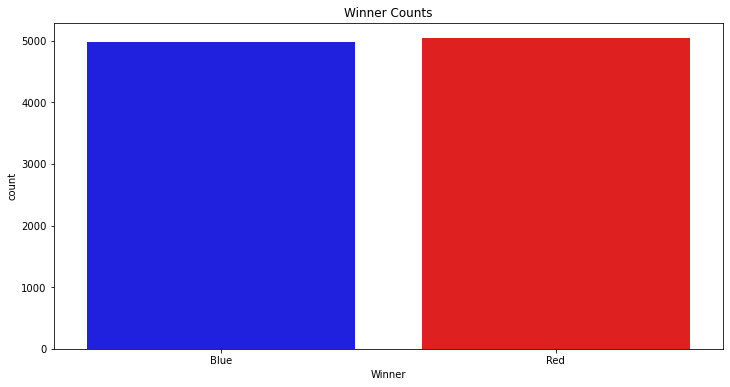

In [19]:
# Created a basic Bar Plot to show that the teams are evenly matched, 
# with the Red team winning slightly more often than the Blue team.
    
plt.figure(figsize=(12, 6))
sns.countplot(x='Winner', data=LeagueDF, palette=['blue', 'red'])
plt.title('Winner Counts')
plt.show()

## 3.1 Count Plots for Object Columns:

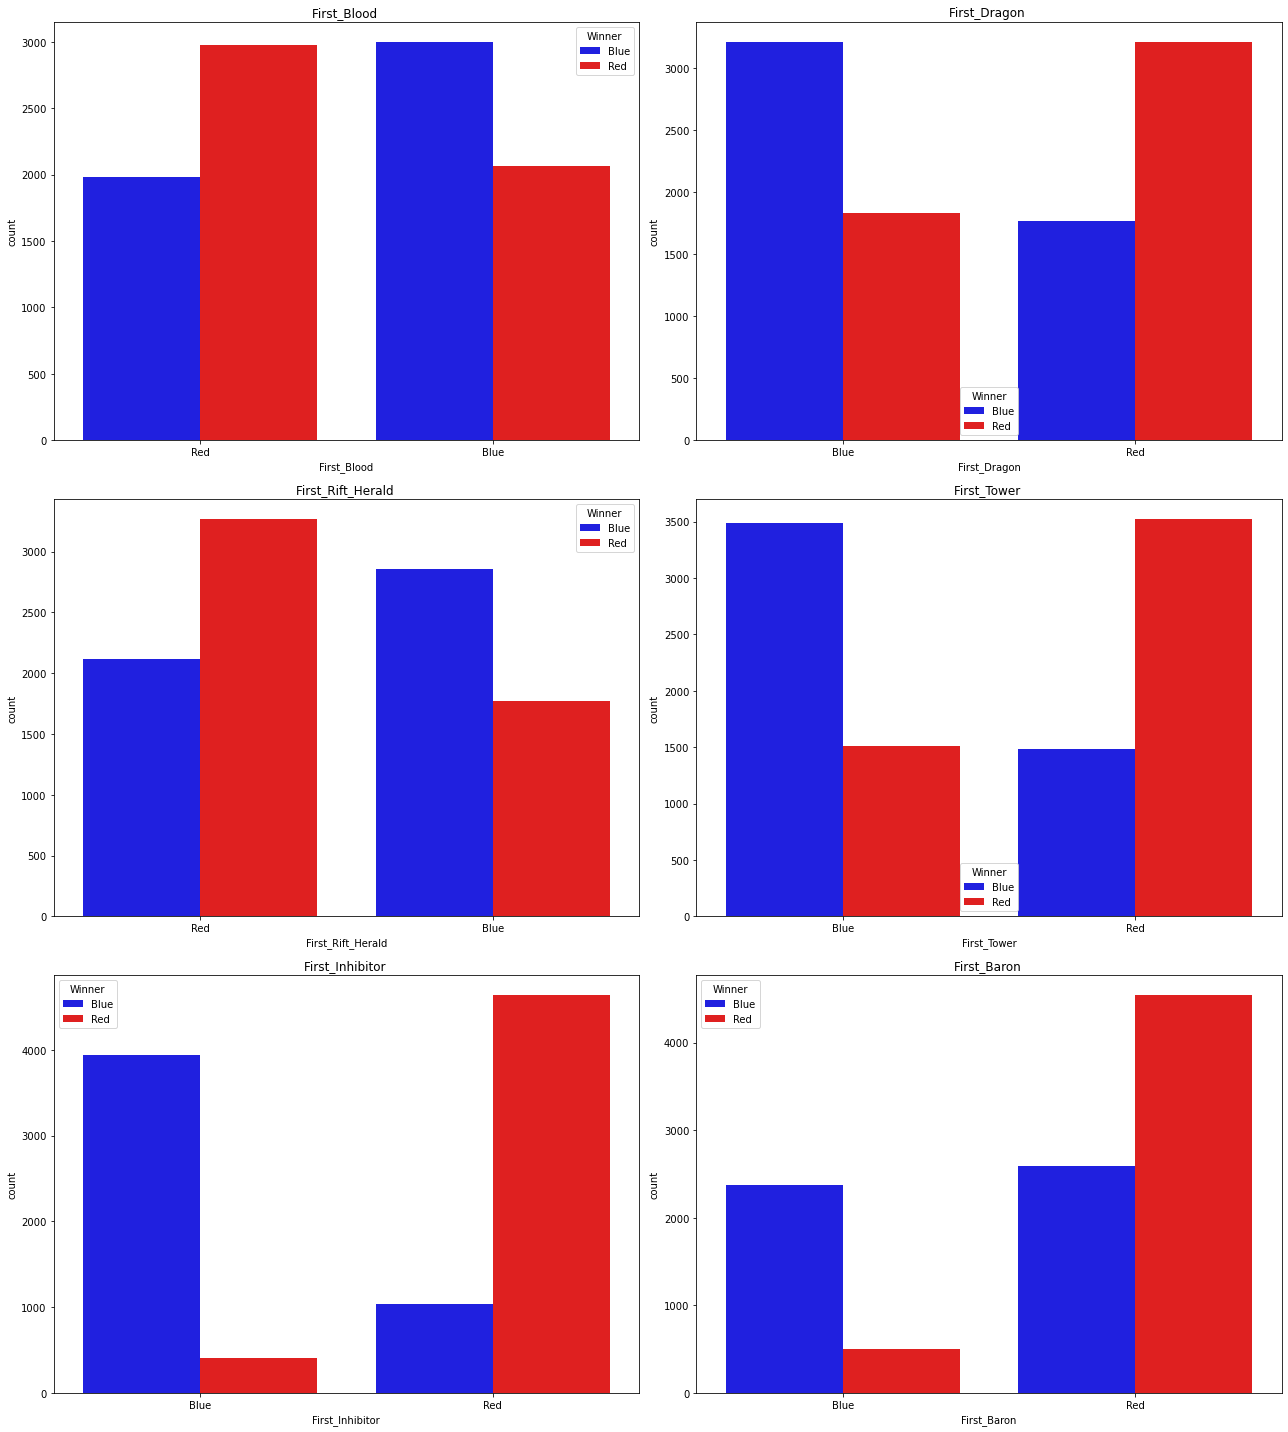

In [20]:
# Listed the categorical columns
cat_cols = ['First_Blood', 'First_Dragon', 'First_Rift_Herald', 'First_Tower', 'First_Inhibitor', 'First_Baron']

# Created Count Plots for each categorical variable compared to the Winner using a For Loop
num_cols = 2
num_rows = (len(cat_cols) + num_cols - 1) // num_cols
plt.figure(figsize=(18, 20))
for i, col in enumerate(cat_cols):
    plt.subplot(num_rows, num_cols, i+1)
    sns.countplot(x=col, hue='Winner', data=LeagueDF, palette=['blue', 'red'])
    plt.title(f'{col} ')
    plt.tight_layout()
plt.show()

### Findings: 
The count plots for each categorical variable compared to the game outcome ('Winner') in the dataset provide insights into how different game events correlate with winning:

__First Baron:__ The team that secures the first Baron tends to win the game more often. The strong correlation suggests that the Baron buff provides significant strategic advantages, including enhanced minion strength and improved combat stats, which could lead to more successful engagements and tower pushes.

__First Inhibitor:__ Teams capturing the first inhibitor generally have a higher chance of winning. An inhibitor's loss impacts lane pressure significantly, allowing super minions to spawn and forcing the opposing team to defend their base, thereby reducing their map control and objective-taking capabilities.

__First Tower:__ Securing the first tower seems to correlate well with winning, as it not only provides a gold advantage but also opens the map for further tactical plays and jungle control. Early tower loss for a team can signify a loss of control over key areas, impacting subsequent objectives like dragons or rift heralds.

__First Dragon:__ Teams that kill the first dragon usually have a higher win rate, although the impact appears to be less than that of the first Baron or first Inhibitor. Dragons provide team-wide buffs that enhance combat effectiveness and may contribute to snowballing advantages.

__First Rift Herald:__ The influence of the first Rift Herald is visible but not as decisive as the other objectives. While capturing the Rift Herald provides a strategic tool for pushing lanes, its impact is usually confined to early or mid-game scenarios and may depend on how effectively it's utilized to destroy structures.

__First Blood:__ Interestingly, the team that scores the first kill does not show a dominant advantage in terms of winning the match. This suggests that while an early kill can provide an initial advantage, it is not a strong predictor of overall match success compared to other objectives.

These plots underscore the importance of early game objectives in shaping the outcome of a match. Teams that focus on securing these key objectives often gain material advantages that translate into higher chances of victory.

## 3.2 Clustered Bar Chart for Numerical Columns:

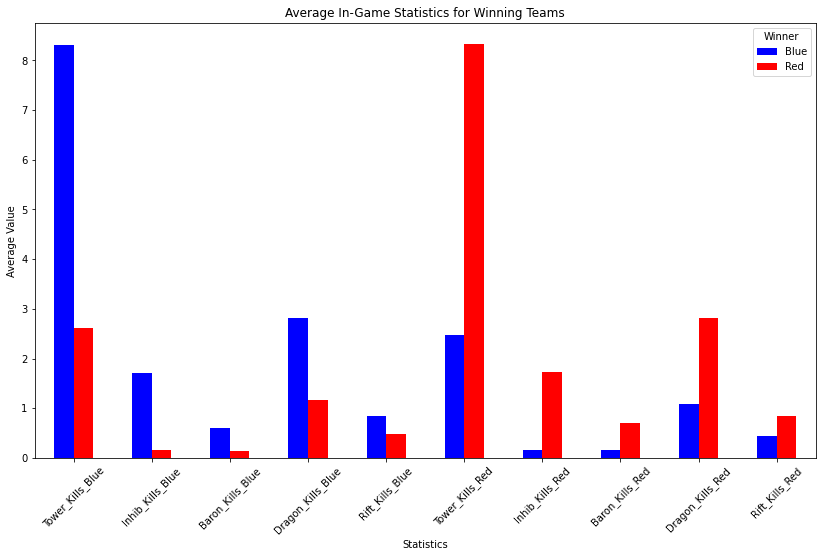

In [21]:
# Calculate average statistics for winning teams
avg_stats_winner = LeagueDF.groupby('Winner').mean()

# Plot the average statistics
colors = ['blue', 'red']

avg_stats_winner.T.plot(kind='bar', figsize=(14, 8), color=colors)
plt.title('Average In-Game Statistics for Winning Teams')
plt.xlabel('Statistics')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Winner')
plt.show()

### Findings:
__Tower Kills:__ There is a distinct difference between the distributions for the winning and losing teams. Winners tend to destroy more towers, which is a strong indicator of map control and progression towards the enemy base.

__Inhibitor Kills:__ Similar to tower kills, the number of inhibitors destroyed is considerably higher for the winning team, underscoring the importance of inhibitors in gaining a strategic advantage and applying pressure across the map.

__Baron Kills:__ The boxen plot indicates that teams that secure more Baron kills generally have a higher chance of winning. Baron buffs significantly boost the team's ability to push lanes and secure objectives.

__Dragon Kills:__ Winning teams usually secure more dragons, suggesting that the buffs provided by dragons (such as increased damage or regeneration) play a crucial role in enhancing team performance and securing victories.

__Rift Herald Kills:__ The impact of Rift Heralds is visible, with winners more likely to have utilized this objective to push lanes effectively, though the overall impact appears slightly less pronounced compared to Barons or Dragons.

## 3.3 Correlation Matrix for all columns:

In [ ]:
# Mapped object columns to numerical values
mapping = {'Blue': 1, 'Red': 0}
for column in LeagueDF.select_dtypes(include=['object']).columns:
    LeagueDF[column] = LeagueDF[column].map(mapping)

# Computed the correlation matrix
correlation_matrix = LeagueDF.corr()

# Created the correlation map
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Map of the Data Set')
plt.show()

### Summary of Correlation Map:
__Positive Correlations with "Winner":__  

_**Tower_Kills_Blue (0.78):**_ This has the highest positive correlation with "Winner," indicating that the number of towers destroyed by the blue team is strongly associated with winning the game.  

_**Inhib_Kills_Blue (0.65):**_ Inhibitor kills by the blue team also show a strong positive correlation with winning.  
 
_**Baron_Kills_Blue (0.41):**_ Baron kills by the blue team have a moderate positive correlation with the outcome.  

_**Dragon_Kills_Blue (0.29):**_ Dragon kills by the blue team have a positive correlation, though it's weaker than other objectives.  

_**First_Tower (0.72):**_ Securing the first tower is strongly associated with winning.  

_**First_Inhibitor (0.47):**_ Securing the first inhibitor shows a moderate positive correlation.  

_**First_Baron (0.29):**_ Securing the first Baron has a positive correlation.  

_**First_Dragon (0.22):**_ Securing the first Dragon has a weaker positive correlation.  

_**First_Rift_Herald (0.19):**_ Securing the first Rift Herald shows a weak positive correlation.  
_  _  _

__Negative Correlations with "Winner":__

_**Tower_Kills_Red (-0.78):**_ This has the highest negative correlation with "Winner," indicating that the number of towers destroyed by the red team is strongly associated with losing the game.

_**Inhib_Kills_Red (-0.65):**_ Inhibitor kills by the red team show a strong negative correlation with winning.

_**Baron_Kills_Red (-0.41):**_ Baron kills by the red team have a moderate negative correlation with the outcome.

_**Dragon_Kills_Red (-0.29):**_ Dragon kills by the red team have a negative correlation.
_  _  _  

__Neutral or Weak Correlations:__

- Features like *"Rift_Kills_Blue"* and *"Rift_Kills_Red"* have weaker correlations with "Winner," indicating that they might not be as crucial in determining the game outcome.

- *"First_Blood"* shows a positive but relatively weak correlation (0.18) with "Winner."
_  _  _  

__Key Insights:__
_**Objective Control:**_ Objective control, particularly tower and inhibitor kills, are strongly associated with winning or losing. The blue team’s performance on these objectives is positively correlated with winning, while the red team’s performance is negatively correlated.  

_**First Objectives:**_ Securing early objectives like the first tower, inhibitor, and Baron shows a significant positive correlation with winning. These can be key predictors in a model aimed at predicting the winner.  

_**Dragons and Rift Heralds:**_ While dragon kills and the first Rift Herald also show positive correlations with winning, their impact appears to be less significant compared to other objectives.  

These correlations suggest that controlling key objectives, especially towers and inhibitors, plays a crucial role in determining the outcome of a League of Legends match.

# 4. Hypothesis Testing:

## 4.1 Chi-Squared Tests
In the Chi-Squared tests conducted, the objective was to evaluate the association between various categorical predictors (e.g., 'First_Blood', 'First_Tower') and the target variable 'Winner'. A p-value less than the 0.05 significance level indicates that the null hypothesis should be rejected, signifying a statistically significant association between the predictor variable and the target variable.  

__Hypotheses:__  
_**Null Hypothesis (H₀):**_ There is no association between the categorical variable and the target variable 'Winner'. This implies that the distribution of the categorical variable is independent of the outcome 'Winner'.  

_**Alternative Hypothesis (H₁):**_ There is a significant association between the categorical variable and the target variable 'Winner'. This suggests that the occurrence of the categorical variable is dependent on the outcome 'Winner'.  

In this context, rejecting the null hypothesis (H₀) indicates that the predictor variable has a statistically significant association with the target variable, thereby implying that the variable potentially contributes to the prediction or understanding of the 'Winner' outcome.

In [22]:
# Created an empty list to hold the results
results = []

# Set target variable as Winner
target = 'Winner'

# Created a for loop and performed Chi-Squared test for each object column against 'Winner'
for col in object_columns:
    if col != target:
        contingency_table = pd.crosstab(LeagueDF[col], LeagueDF[target])
        chi2, p, dof, _ = chi2_contingency(contingency_table)
        decision = 'Reject Null Hypothesis - There is a significant association between the variables.' if p < 0.05 else 'Fail to reject the null hypothesis - There is no significant association between the variables.'
        
        result = {
            'Variable': col,
            'Chi-Squared Statistic': chi2,
            'P-value': p,
            'Degrees of Freedom': dof,
            'Decision': decision
        }
        results.append(result)

# Converted the results into a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Displayed the results with the decision. Printed each on a new line for easier viewing.
for index, row in results_df.iterrows():
    print(f"\033[1mVariable:\033[0m {row['Variable']}")
    print(f"\033[1mChi-Squared Statistic:\033[0m {row['Chi-Squared Statistic']}")
    print(f"\033[1mP-value:\033[0m {row['P-value']:.5f}") 
    print(f"\033[1mDegrees of Freedom:\033[0m {row['Degrees of Freedom']}")
    print(f"\033[1mDecision:\033[0m {row['Decision']}\n")
    

Variable: First_Blood
Chi-Squared Statistic: 371.94023631474437
P-value: 0.00000
Degrees of Freedom: 1
Decision: Reject Null Hypothesis - There is a significant association between the variables.

Variable: First_Tower
Chi-Squared Statistic: 1608.3582155877673
P-value: 0.00000
Degrees of Freedom: 1
Decision: Reject Null Hypothesis - There is a significant association between the variables.

Variable: First_Inhibitor
Chi-Squared Statistic: 5160.978618176503
P-value: 0.00000
Degrees of Freedom: 1
Decision: Reject Null Hypothesis - There is a significant association between the variables.

Variable: First_Baron
Chi-Squared Statistic: 1760.4923582643444
P-value: 0.00000
Degrees of Freedom: 1
Decision: Reject Null Hypothesis - There is a significant association between the variables.

Variable: First_Dragon
Chi-Squared Statistic: 789.4590450363002
P-value: 0.00000
Degrees of Freedom: 1
Decision: Reject Null Hypothesis - There is a significant association between the variables.

Variable: Fi

### Summary of Results:
These findings suggest that each of the predictor variables listed above have a significant association with the target variable 'Winner', leading to the rejection of the null hypothesis in each case. This implies that these variables are likely important factors in predicting the target variable and should be considered in further analyses and modeling efforts.

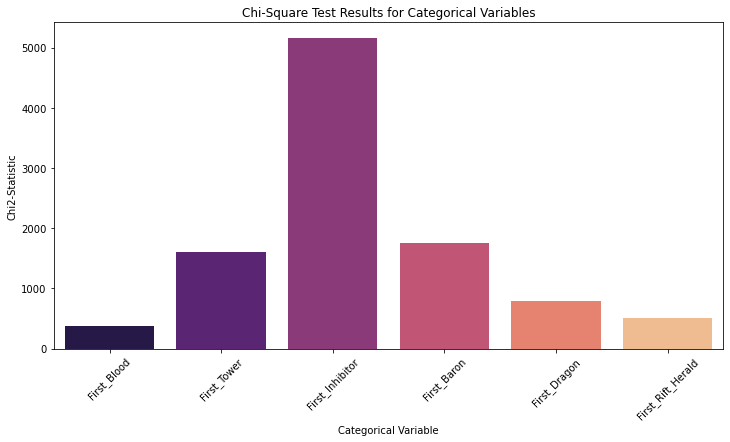

In [27]:
# Plotting Chi-Square test results
plt.figure(figsize=(12, 6))
sns.barplot(x='Variable', y='Chi-Squared Statistic', data=results_df, palette='magma')
plt.xticks(rotation=45)
plt.title('Chi-Square Test Results for Categorical Variables')
plt.ylabel('Chi2-Statistic')
plt.xlabel('Categorical Variable')
plt.show()

## 4.2 Independent T-test:
In this analysis, an independent samples t-test (also known as the two-sample t-test or unpaired t-test) was utilized. This statistical test compares the means of two independent groups (e.g., 'Blue' and 'Red' for the target variable 'Winner') to determine if there is a significant difference between them. Specifically, the t-tests were applied to compare the means of various numerical variables (e.g., 'Tower_Kills_Blue', 'Baron_Kills_Red') across the two groups defined by the target variable 'Winner' ('Blue' vs. 'Red').

__Hypotheses:__  
_**Null Hypothesis (H₀):**_ The means of the numerical variable are equal for the two groups defined by 'Winner'. This implies that there is no significant difference in the means of the numerical variable between the 'Blue' and 'Red' groups.  

_**Alternative Hypothesis (H₁):**_ The means of the numerical variable are not equal for the two groups defined by 'Winner'. This indicates that there is a significant difference in the means of the numerical variable between the 'Blue' and 'Red' groups.  

If the p-value is less than a predefined significance level (e.g., 0.05), the null hypothesis is rejected, indicating a statistically significant difference between the means of the two groups. This result suggests that the numerical variable significantly differs between the 'Blue' and 'Red' groups, providing valuable insights into the factors associated with the 'Winner' outcome.

In [24]:
# Created a list of all my int64 columns
numerical_columns = ['Tower_Kills_Blue', 'Inhib_Kills_Blue', 'Baron_Kills_Blue', 'Dragon_Kills_Blue', 'Rift_Kills_Blue',
                     'Tower_Kills_Red', 'Inhib_Kills_Red', 'Baron_Kills_Red', 'Dragon_Kills_Red', 'Rift_Kills_Red']

# Created an empty list for the results
t_test_results = []

# Created a for loop to preform the T-Test on all numerical columns vs Winner.
for col in numerical_columns:
    group1 = LeagueDF[LeagueDF[target] == 'Blue'][col]
    group2 = LeagueDF[LeagueDF[target] == 'Red'][col]
    
    t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
    decision = 'Reject Null Hypothesis - There is a significant association between the variables.' if p < 0.05 else 'Fail to reject the null hypothesis - There is no significant association between the variables.'
    
    result = {
        'Variable': col,
        'T-Statistic': t_stat,
        'P-value': p_value,
        'Decision': decision
    }
    t_test_results.append(result)

# Converted the results into a DataFrame for easier viewing
t_test_df = pd.DataFrame(t_test_results)

# Displayed the results with the decision. Printed each on a new line for easier viewing.
for index, row in t_test_df.iterrows():
    print(f"\033[1mVariable:\033[0m {row['Variable']}")
    print(f"\033[1mT-Statistic:\033[0m {row['T-Statistic']}")
    print(f"\033[1mP-value:\033[0m {row['P-value']:.5f}") 
    print(f"\033[1mDecision:\033[0m {row['Decision']}\n")

Variable: Tower_Kills_Blue
T-Statistic: 119.63639003835749
P-value: 0.00000
Decision: Reject Null Hypothesis - There is a significant association between the variables.

Variable: Inhib_Kills_Blue
T-Statistic: 85.02665096417978
P-value: 0.00000
Decision: Reject Null Hypothesis - There is a significant association between the variables.

Variable: Baron_Kills_Blue
T-Statistic: 44.77516536912868
P-value: 0.00000
Decision: Reject Null Hypothesis - There is a significant association between the variables.

Variable: Dragon_Kills_Blue
T-Statistic: 71.97529068557823
P-value: 0.00000
Decision: Reject Null Hypothesis - There is a significant association between the variables.

Variable: Rift_Kills_Blue
T-Statistic: 27.660909696893725
P-value: 0.00000
Decision: Reject Null Hypothesis - There is a significant association between the variables.

Variable: Tower_Kills_Red
T-Statistic: -125.0032982328567
P-value: 0.00000
Decision: Reject Null Hypothesis - There is a significant association between 

### Summary of Results:
These findings demonstrate that all tested numerical variables exhibit significant differences in their means between the 'Blue' and 'Red' groups, suggesting that these variables are important in distinguishing between the two outcomes and should be considered in further analyses and modeling efforts.

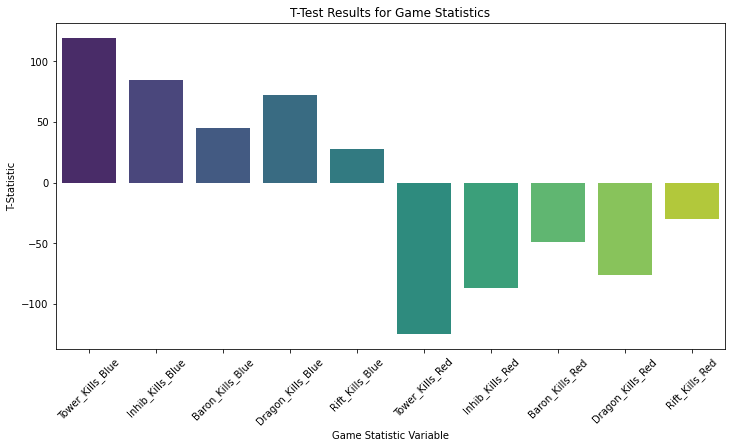

In [25]:
# Plotting T-test results
plt.figure(figsize=(12, 6))
sns.barplot(x='Variable', y='T-Statistic', data=t_test_df, palette='viridis')
plt.xticks(rotation=45)
plt.title('T-Test Results for Game Statistics')
plt.ylabel('T-Statistic')
plt.xlabel('Game Statistic Variable')
plt.show()


# Conclusion
__Overview__  
This analysis has provided a detailed examination of the main objectives in League of Legends and their impact on match outcomes. By leveraging a range of data visualization and statistical techniques, we have uncovered significant insights into how specific in-game events and achievements correlate with winning or losing a match.  

__Key Findings__  
_**Main Objectives Impact:**_ The analysis confirms the critical importance of primary objectives such as Dragon, Baron, and Turret destructions. Teams that secure these objectives are more likely to emerge victorious, underscoring their strategic value in the game.  

_**Early Game Performance:**_ Early game achievements, particularly securing the first Dragon and the first Turret, are strong predictors of a team's overall performance. Teams that dominate early tend to maintain their advantage throughout the match.  

_**Player Coordination:**_ Effective team coordination around key objectives is a hallmark of successful teams. The ability to work together strategically, especially during crucial moments like Baron and Dragon fights, often determines the outcome of the game.  

_**Statistical Correlations:**_ Through extensive exploratory data analysis and correlation studies, we have quantified the relationship between various in-game actions and match results. These correlations provide a data-driven understanding of the game's dynamics.  
_ _ _

__Recommendations:__  
_**For players:**_
Prioritize early game objectives like the first Dragon and the first Turret to build a strong lead.  
Focus on team coordination and strategic planning around major objectives such as Baron to enhance chances of victory.  

_**For analysts and developers:**_
Consider the critical role of major objectives in game design and balance to ensure a fair and competitive environment.  
Use the insights from this analysis to develop resources that help players improve their strategies and gameplay.  
_ _ _

__Future Work__  
Future analyses could provide deeper insights into individual player performance and team dynamics by incorporating more granular data and employing advanced statistical techniques. This approach can significantly enhance our understanding of the factors influencing match outcomes in League of Legends.

_**Key areas for further exploration include:**_  
- Variations in objective prioritization across different skill levels and regions.  
- The impact of meta changes and patches on the significance of various objectives.  
- By addressing these aspects, we can develop a more comprehensive understanding of the game's evolving landscape and the strategic elements that contribute to success at various levels of play.  


In conclusion, this notebook provides a comprehensive analysis of the main objectives in League of Legends and their significant impact on match outcomes. The findings offer valuable insights for players looking to improve their strategies and for developers aiming to understand and enhance the game's dynamics.